Yashi\
23122144\
3MScDS-B

# *CAC-2*
### Exploring KNN classifier with the help of Tic-Tac-Toe dataset 

#### DATASET: This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").
###### THE DATASET:https://www.kaggle.com/datasets/rsrishav/tictactoe-endgame-data-set

#### *OBJECTIVE:* 
##### To understand the dataset using simple EDA and visualizations 
##### To run KNN model on the dataset and check the model accuracy
##### To try different tunings and changes with the dataset to see the impact on the model's accuracy

### *K- Nearest Neighbour*

##### K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm. K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

##### How does KNN work:

1: Select the number K of the neighbors \
2: Calculate the Euclidean distance of K number of neighbors \
3: Take the K nearest neighbors as per the calculated Euclidean distance. \
4: Among these k neighbors, count the number of the data points in each category. \
5: Assign the new data points to that category for which the number of the neighbor is maximum. \
6: Our model is ready.

## EXPLORATORY DATA ANALYSIS


In [569]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np 

  
# Load dataset
data=pd.read_csv("tic-tac-toe.data.csv")
data

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [570]:
#convert the dataset to a dataframe
df=pd.DataFrame(data)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [571]:
# Display first few rows
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [572]:
# Display last few rows
df.tail()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative
957,o,o,x,x,x,o,o,x,x,negative


In [573]:
# size of the dataset
df.shape

(958, 10)

From here we get that the dataset has 958 rows and 10 columns.

In [574]:
# checking for null values
df.isna().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
Class                   0
dtype: int64

This shows us that there are no null values in the dataset

In [575]:
# Summary statistics
df.describe()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


From this we get that the different columns have 958 rows with 3 unique values for all the columns other than the target column i.e. 'Class' which has 2 unique value or labels.

In [576]:
# Information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top-left-square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
 9   Class                 958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


From the above code we understand that the datatype in the original dataset is categorical and all the columns have 0 null values

To have a better understanding of the data and to run our machine learning model we will be converting the non numerical or categorical data to numerical value.

In [577]:
# Map categorical variables to numerical values
d={'o':0,'x':1,'b':2}
for col in df.columns[:-1]:  # Exclude the 'Class' column
    df[col] = df[col].map(d)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,0,0,1,0,0,positive
1,1,1,1,1,0,0,0,1,0,positive
2,1,1,1,1,0,0,0,0,1,positive
3,1,1,1,1,0,0,0,2,2,positive
4,1,1,1,1,0,0,2,0,2,positive
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,negative
954,0,1,0,1,1,0,1,0,1,negative
955,0,1,0,1,0,1,1,0,1,negative
956,0,1,0,0,1,1,1,0,1,negative


Here we convert the o , x , b value to 0 , 1 , 2 respectively
 

In [578]:
d={'positive':4,'negative':5}
df["Class"]=df["Class"].map(d)
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,0,0,1,0,0,4
1,1,1,1,1,0,0,0,1,0,4
2,1,1,1,1,0,0,0,0,1,4
3,1,1,1,1,0,0,0,2,2,4
4,1,1,1,1,0,0,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,5
954,0,1,0,1,1,0,1,0,1,5
955,0,1,0,1,0,1,1,0,1,5
956,0,1,0,0,1,1,1,0,1,5


Here we are converting our target variable data to numerical type data,
positive being converted to 4 and negative being converted to 5\
Here positive represents winning and negative represents losing

In [579]:
df['Class'].value_counts()

Class
4    626
5    332
Name: count, dtype: int64

This give us the count of the unique values in our Class column

In [580]:
df.mode()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,1,1,1,1,1,4


Here we can see which variable occurs the most in each column

In [581]:
df.corr()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
top-left-square,1.000000,-0.038111,-0.060573,-0.038111,-0.033286,-0.098413,-0.060573,-0.098413,-0.010799,-0.112727
top-middle-square,-0.038111,1.000000,-0.038111,-0.079677,-0.056155,-0.079677,-0.098413,-0.022118,-0.098413,0.013396
top-right-square,-0.060573,-0.038111,1.000000,-0.098413,-0.033286,-0.038111,-0.010799,-0.098413,-0.060573,-0.112727
middle-left-square,-0.038111,-0.079677,-0.098413,1.000000,-0.056155,-0.022118,-0.038111,-0.079677,-0.098413,0.013396
middle-middle-square,-0.033286,-0.056155,-0.033286,-0.056155,1.000000,-0.056155,-0.033286,-0.056155,-0.033286,-0.256653
middle-right-square,-0.098413,-0.079677,-0.038111,-0.022118,-0.056155,1.000000,-0.098413,-0.079677,-0.038111,0.013396
bottom-left-square,-0.060573,-0.098413,-0.010799,-0.038111,-0.033286,-0.098413,1.000000,-0.038111,-0.060573,-0.112727
bottom-middle-square,-0.098413,-0.022118,-0.098413,-0.079677,-0.056155,-0.079677,-0.038111,1.000000,-0.038111,0.013396
bottom-right-square,-0.010799,-0.098413,-0.060573,-0.098413,-0.033286,-0.038111,-0.060573,-0.038111,1.000000,-0.112727
Class,-0.112727,0.013396,-0.112727,0.013396,-0.256653,0.013396,-0.112727,0.013396,-0.112727,1.000000


Each cell in the matrix represents the correlation coefficient between the corresponding pair of variables. 

-Values close to 1 indicate a strong positive correlation. \
-Values close to -1 indicate a strong negative correlation. \
-Values close to 0 indicate no correlation or a very weak correlation. 

For example: 

-The correlation coefficient between top-left-square and top-middle-square is approximately -0.038, indicating a weak negative correlation between these two variables. \
-The correlation coefficient between middle-middle-square and Class is approximately -0.257, indicating a moderate negative correlation between these two variables 


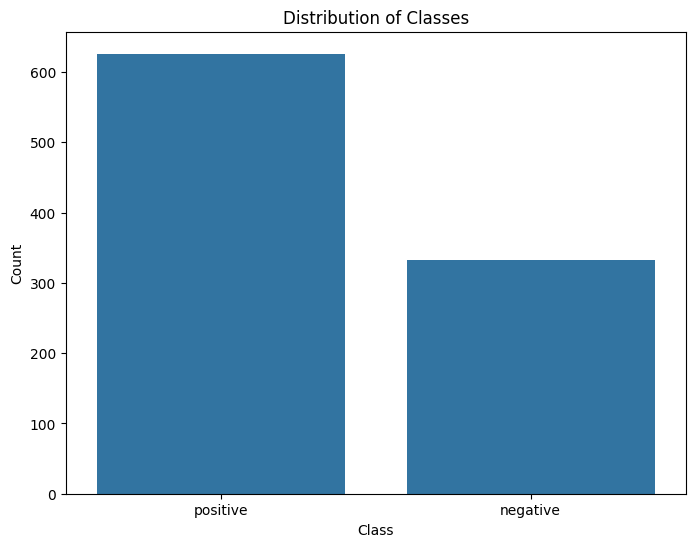

In [582]:
# Visualize class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


The above graph is a count plot that shows the distribution of labels in the class column\
We can see that the count of positives is more than the count of negative.

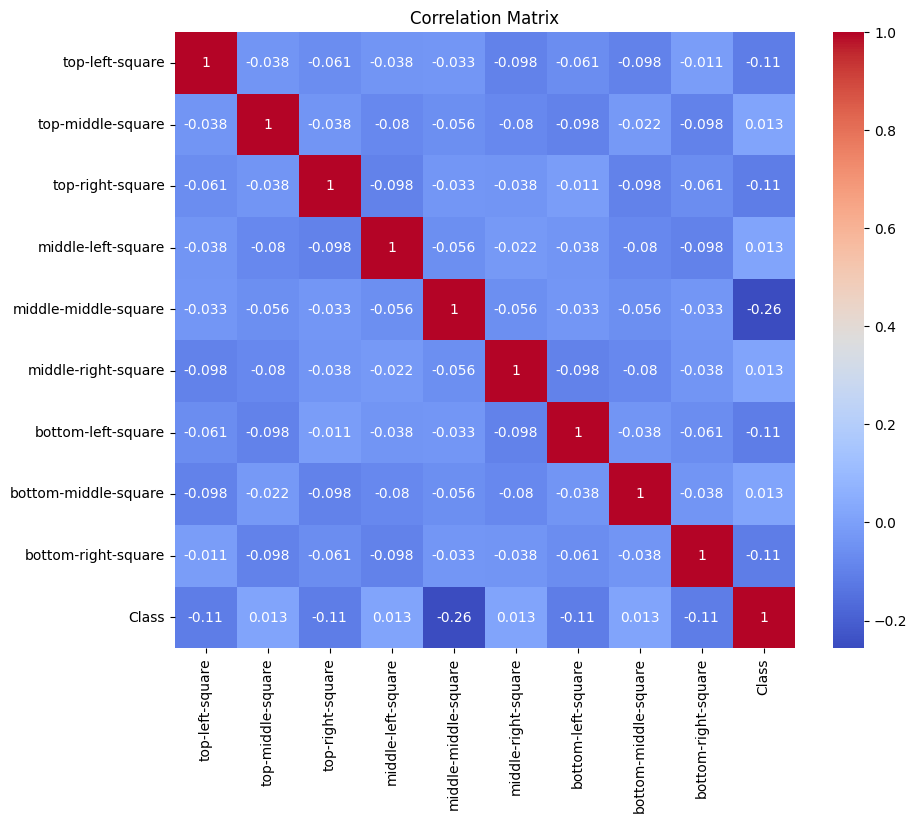

In [583]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The above graph is a heatmap that shows the correlation between any 2 columns of the dataset which we have also analysed using the corr() function earlier.
The visualisation represents that the darker colors have more correlation than the lighter colors.

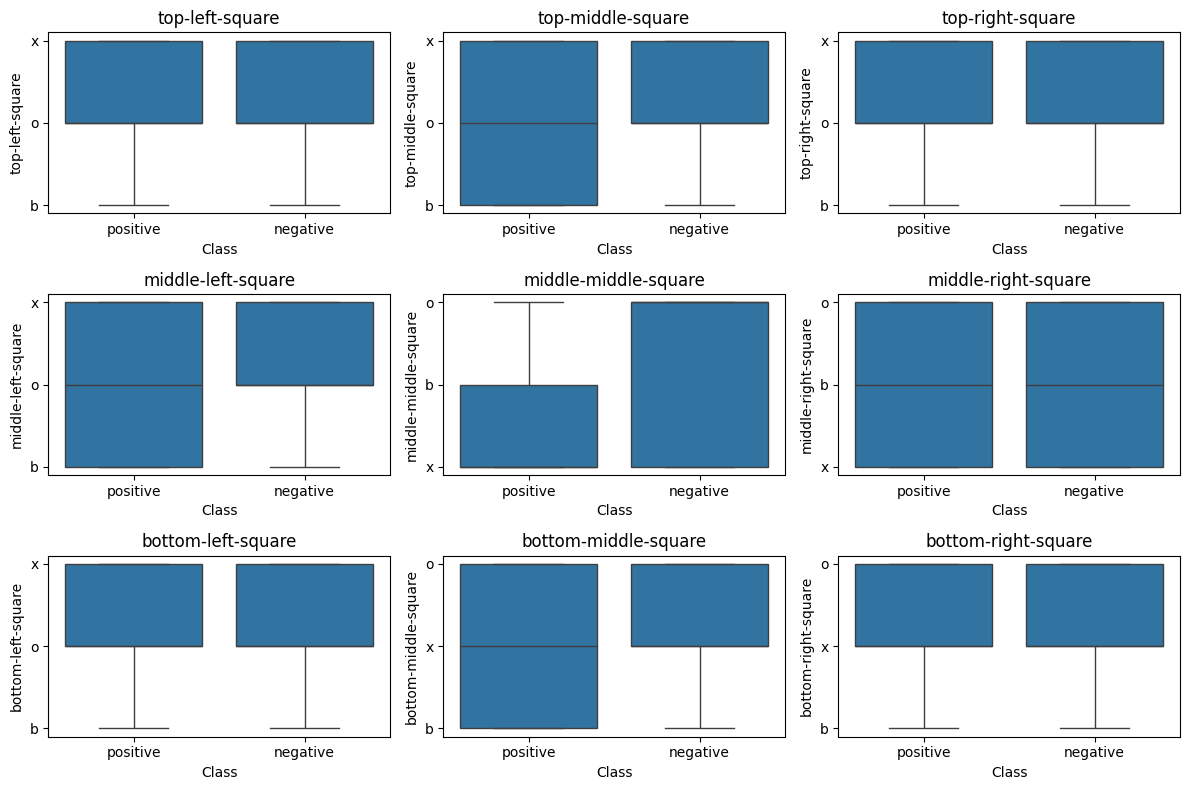

In [584]:
# Visualize boxplots for each feature with respect to the target variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Class', y=column, data=data)
    plt.title(column)
plt.tight_layout()
plt.show()

The boxplots create visualizations of the distribution of each feature with respect to the target variable (Class).\
For the given dataset, the boxplots will help you analyze how the values of each tic-tac-toe board position (top-left-square, top-middle-square, etc.) are distributed for the two classes (positive and negative).\
If the boxplot shows that the median value for Class positive is higher than for Class negative then that feature may be a good discriminator for the class. 


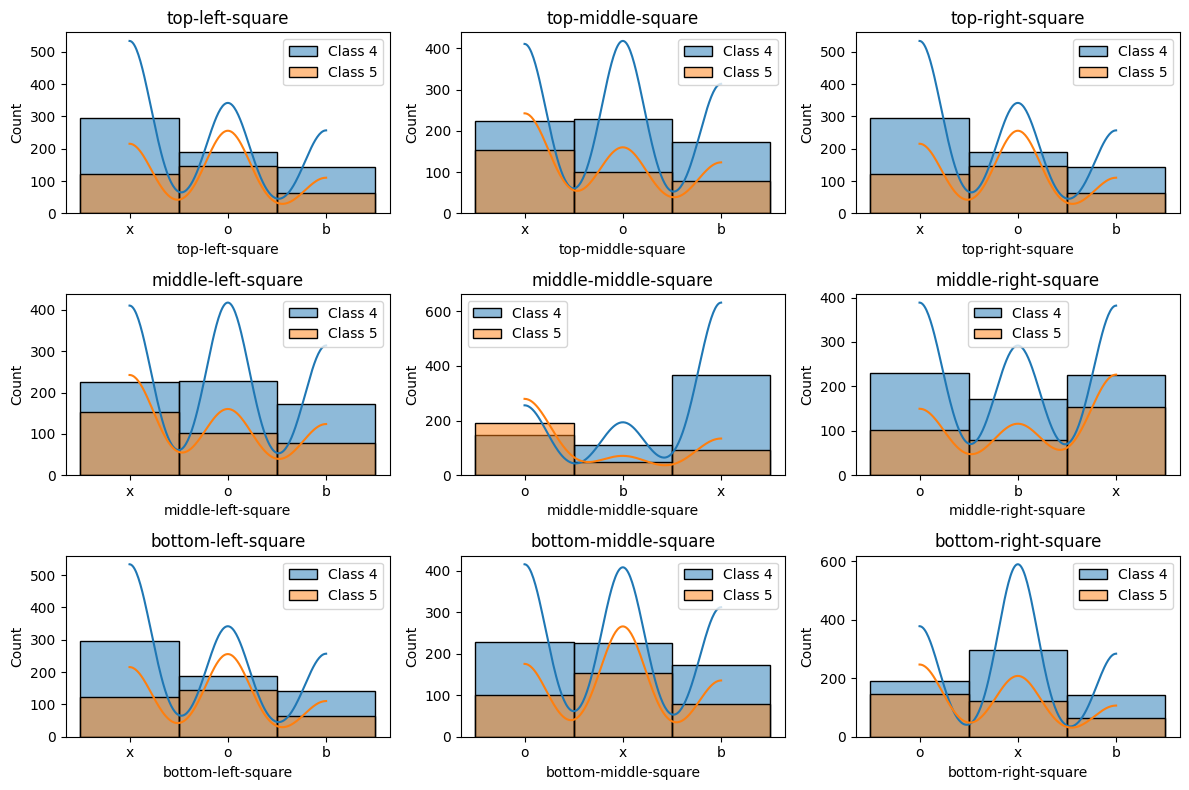

In [585]:
# Visualize histograms for each feature separated by target variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    for cls in df['Class'].unique():
        sns.histplot(data[df['Class']==cls][column], label=f'Class {cls}', kde=True, alpha=0.5)
    plt.title(column)
    plt.legend()
plt.tight_layout()
plt.show()

The above histograms display the distribution of data points for each feature, showing how frequently different values occur

## K-Nearest Neighbour

In [586]:

features=["top-left-square","top-middle-square","top-right-square","middle-left-square","middle-middle-square","middle-right-square","bottom-left-square","bottom-middle-square","bottom-right-square"]
# Extract features and target variable
X=np.array(df)
X = X[:,:-1]
y = X[:,-1] 
  
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=9) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

[1 0 0 0 0 1 1 1 0 1 0 2 1 1 1 1 1 2 1 1 1 0 2 2 1 1 0 2 1 0 2 0 0 2 1 0 1
 1 1 0 2 2 0 0 0 0 1 2 0 1 2 0 1 0 1 2 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 2 1 1 0 1 0 2 2 0 0 2 0 0 2 2 1 0 0 0 0 1 1 0 1 1 0 1 0 2 2 1 1 1 1 1 2 2
 1 1 0 2 0 1 1 0 1 1 1 0 2 1 1 0 1 0 0 1 1 1 2 1 1 1 1 2 1 0 2 1 0 1 1 1 2
 0 0 1 0 0 1 0 0 0 0 1 1 2 1 1 1 1 1 0 1 1 0 2 1 2 0 0 1 0 0 0 1 1 1 0 0 2
 0 1 0 2 2 0 1]
0.96875


The above code fits the data into a KNN classifier after splitting the data into training and testing data(80% and 20%).\
The value of k or the number of nearest neighbours are taken to be 9 here and we also predict the accuracy of the model.


for  0 the training accuracy is  1.0 and the testing accuracy is  0.7864583333333334
for  1 the training accuracy is  0.8838120104438643 and the testing accuracy is  0.7135416666666666
for  2 the training accuracy is  0.9490861618798956 and the testing accuracy is  0.859375
for  3 the training accuracy is  0.9503916449086162 and the testing accuracy is  0.8385416666666666
for  4 the training accuracy is  0.9673629242819843 and the testing accuracy is  0.90625
for  5 the training accuracy is  0.95822454308094 and the testing accuracy is  0.921875
for  6 the training accuracy is  0.9817232375979112 and the testing accuracy is  0.9375
for  7 the training accuracy is  0.9673629242819843 and the testing accuracy is  0.921875
for  8 the training accuracy is  0.97911227154047 and the testing accuracy is  0.96875
for  9 the training accuracy is  0.9751958224543081 and the testing accuracy is  0.9322916666666666
for  10 the training accuracy is  0.9804177545691906 and the testing accuracy is  0

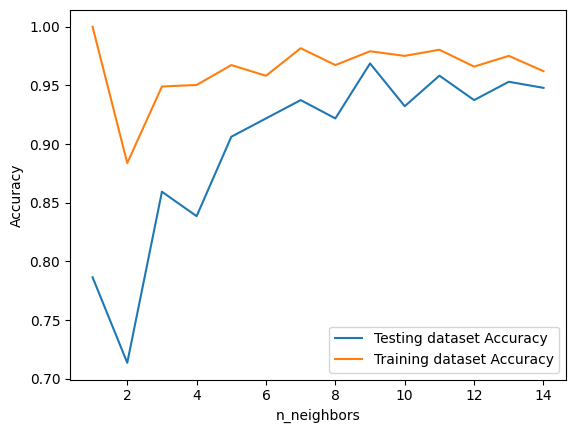

In [587]:
# Hyperparameter tuning for kNN
neighbors = np.arange(1, 15) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
    print("for ",i,"the training accuracy is ",train_accuracy[i],"and the testing accuracy is ",test_accuracy[i])

# Plotting accuracy vs number of neighbors
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

The hyperparameter tuning process for the k-Nearest Neighbors (kNN) classifier was carried out by varying the number of neighbors (n_neighbors) from 1 to 14. The training and testing accuracies for each value of k were calculated and plotted.\
The highest testing accuracy is achieved at k=8 with an accuracy of 96.88%'\
The testing accuracy is relatively stable for values of k between 6 and 13, suggesting that the model is robust within this range.\
This visualization supports the insights drawn from the hyperparameter tuning process, confirming that a k value of around 8 is optimal for this kNN classifier on the provided dataset.

The reference of the above code is taken from:\
https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

#### Principal Component Analysis

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 

In [588]:
# Reduce dimensionality using PCA
n_components=2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
df_pca1 = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)


              PC1       PC2
0   -5.389866e-14  0.347813
1   -5.000000e-01 -0.350789
2   -3.166645e-14  0.347813
3   -1.000000e+00 -0.061484
4    5.312684e-14  1.335720
..            ...       ...
953 -5.000000e-01 -0.350789
954 -2.211853e-14  0.162422
955  5.000000e-01 -0.350789
956  3.217138e-14  0.162422
957  3.194239e-14  0.162422

[958 rows x 2 columns]


Here we have used PCA to make the visualization easier as reducing data to two or three principal components which helps for visual understanding.\
We can plot and visualize the decision boundaries of the kNN classifier, which provides insights into how the model differentiates between positive and negative classes.

In [589]:
features=["top-left-square","top-middle-square","top-right-square","middle-left-square","middle-middle-square","middle-right-square","bottom-left-square","bottom-middle-square","bottom-right-square"]
X=np.array(df)
y = X[:,-1] 
  
# Split dataset with PCA into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( 
             df_pca1, y, test_size = 0.2, random_state=42) 

# Initialize kNN classifier after PCA
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the model after PCA
knn.fit(X_train, y_train) 
  
# Predict on the test set after PCA
print(knn.predict(X_test)) 

# Calculate the accuracy of the model after PCA
print("the accuracy is : " ,knn.score(X_test, y_test)) 

[5 4 4 5 5 4 4 4 4 5 4 4 4 4 4 4 4 4 5 5 5 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 4 4 5 5 4 4 4 4 5 4 5 5 4 5 5 4 4 4 5 5 4 4 5 4 4 4 4 5 4 4 5 5 5 4
 5 4 4 5 4 5 4 4 4 4 4 4 5 4 4 4 4 5 4 5 4 4 5 4 4 4 4 4 5 4 4 4 4 4 5 4 4
 4 4 5 4 4 5 4 5 5 4 4 4 5 5 4 5 4 5 4 4 4 5 4 4 4 4 4 5 4 5 4 4 4 5 4 4 5
 4 4 4 4 4 5 4 4 5 4 5 5 5 4 4 4 4 4 5 4 4 4 4 5 5 4 4 4 5 4 4 5 4 4 5 5 4
 4 4 4 5 4 4 5]
the accuracy is :  0.890625


After PCA we fit the moel in the KNN clasifier again and check the model accuracy.\
If the accuracy after PCA is close to the original accuracy, it indicates that PCA has successfully reduced the dimensionality while preserving the important information.


c:\Users\yashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\yashi\AppData\Local\Temp\ipykernel_19776\2104542226.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_test = plt.scatter(X_red[len(y_train):, 0], X_red[len(y_train):, 1], c=y_test, edgecolor='k', s=100, marker='x', cmap=plt.cm.RdYlBu)


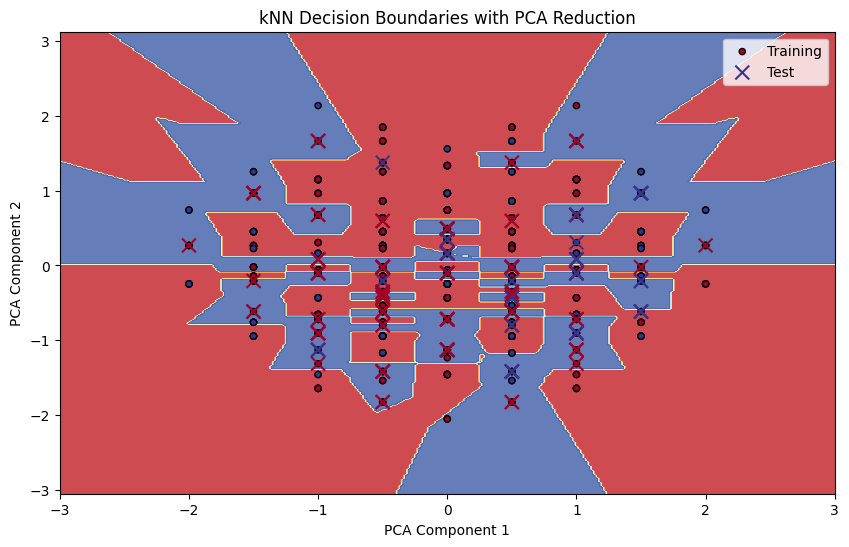

In [590]:

# Plotting decision boundaries with PCA

h = .02  # Step size in the mesh
X_red = np.array(df_pca1)
x_min, x_max = X_red[:, 0].min() - 1, X_red[:, 0].max() + 1
y_min, y_max = X_red[:, 1].min() - 1, X_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

scatter_train = plt.scatter(X_red[:len(y_train), 0], X_red[:len(y_train), 1], c=y_train, edgecolor='k', s=20, cmap=plt.cm.RdYlBu)

scatter_test = plt.scatter(X_red[len(y_train):, 0], X_red[len(y_train):, 1], c=y_test, edgecolor='k', s=100, marker='x', cmap=plt.cm.RdYlBu)

plt.legend(handles=[scatter_train, scatter_test], labels=['Training', 'Test'])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('kNN Decision Boundaries with PCA Reduction')
plt.show()


The plot shows the decision boundaries created by the kNN classifier in the reduced 2D space.\
Different regions are colored based on the predicted class, providing a visual representation of how the classifier differentiates between classes.\
Training points (small markers) and test points (large markers) are overlaid on the plot, helping to visualize how well the model separates different classes.\
The plot helps to identify areas where the model might be making incorrect predictions, such as test points falling in regions assigned to a different class.

-Code for graph referenced from ChatGPT.